# Hypothesis Testing

## Null and Alternative Hypotheses

A pretty painted picture of science posits that a scientist formulates a hypothesis that explains or generalizes from some set of observations, and then conducts some experiment, which will either confirm or refute that hypothesis.

A nice simplification, but an oversimplification. Consider the possibility that the experiment yields statistically improbable results. In that case it may well be a mistake to generalize from those results or to reject a hypothesis that doesn't predict them.

Often the confirmation of some testing/experiment/ **alternative hypothesis, $H_\alpha$**, is a _relative_ affair, where it is measured against some **null hypothesis, $H_0$**.

If an alternative hypothesis states that there is some significant relationship between two variables, then the null hypothesis simply states that there is no such relationship.

If we're testing the function of a new drug, then the null hypothesis will say that the drug has _no effect_ on patients, or anyway no effect relative to relief of the malady the drug was designed to combat. If we're testing whether Peeps cause dementia, then the null hypothesis will say that there is _no correlation_ between Peeps consumption and rate of dementia development.

## $p$-Values

The basic idea of a p-value is to quantify the probability that the results seen are in fact the result of mere random chance. This is connected with the null hypothesis since, if the null hypothesis is true and there is no significant correlation between the population variables X and Y, then of course any correlation between X and Y observed in our sample would have to be the result of mere random chance.

### How Unlikely Is *Too* Unlikely?

Suppose we calculate a p-value for some statistic we've measured (more on this below!) and we get a p-value of 20%. This would mean that there is a 20% chance that the results we observed were the result of mere random chance. Probably this is high enough that we ought _not_ to reject the null hypothesis that our variables are uncorrelated.

In practice, a p-value _threshold_ of 5% is very often the default value for these tests of statistical significance. Thus, if it is calculated that the chance that the results we observed were actually the result of randomness is less than 1 in 20, then we would _reject_ the null hypothesis and _accept_ the alternative hypothesis.

### Definitions

#### Significance Level $\alpha$

The significance level $\alpha$ is the threshold at which you're okay with rejecting the null hypothesis. It is the probability of rejecting the null hypothesis when it is true.

The most commonly used significance level is $\alpha = 0.05$. When you set $\alpha = 0.05$, you're saying "I'm okay with rejecting the null hypothesis if there is less than a 5% chance that the results I am seeing are actually due to randomness".

#### Test Statistic

"The test statistic takes your data from an experiment or survey and compares your results to the results you would expect from the null hypothesis."

-- [Statistic How-To](https://www.statisticshowto.com/test-statistic/)

This test statistic is what exactly you calculate, and then you use the threshold significance level to decide whether this test statistic is large enough. 

"The larger the t score, the larger the difference is between the groups you are testing" (also from [Statistics How-To](https://www.statisticshowto.com/probability-and-statistics/t-distribution/t-score-formula/))

#### p-values

The p-value is the probability of observing a test statistic at least as large as the one observed, by random chance, assuming that the null hypothesis is true.

If $p \lt \alpha$, we reject the null hypothesis.

If $p \geq \alpha$, we fail to reject the null hypothesis.

> *We do **not** accept the alternative hypothesis, we only **reject** or **fail to reject** the null hypothesis in favor of the alternative.*



### What P-Values Are, and What They Aren't

There's a trend in stats right now of criticizing P-values, so you may see some criticism of using P-values to conduct tests. Yudi Pawitan, who works in Medical Epidemiology and Biostatistics at the Karolinska Institutet in Stockholm, Sweden, was recently on Data Skeptic to discuss his recent paper: _Defending the P-value_.

If you want to learn more about the controversy, and what P-values are and what they aren't, I recommend you give the episode a listen:

https://podcasts.apple.com/us/podcast/defending-the-p-value/id890348705?i=1000494460371

The point: scientists often don't do enough work thinking through what p-value _threshold_ they should use, which can lead to problems. Often the standard is 5% (.05) - but while that works fine for some areas of research, that might be too low or too high for others. 

P-values more than anything are way of balancing between false positives and false negatives, which we'll discuss more later in this notebook. But, when deciding your threshold, you should think through the cost of your false positive versus the cost of your false negative, rather than using some arbitrary standard.

## So, The Tests

Statistical hypothesis tests, at their core, check for statistically significant differences. But there are plenty of varieties...

### One-sample z-test

For large enough sample sizes (at least $n$ =30), with known population standard deviation $\sigma$, the _test statistic_ of the sample mean $\bar x$ is given by the z-statistic,

$$Z = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}$$

where $\mu$ is the population mean.

Our hypothesis test tries to answer the question of how likely we are to observe a z-statistic as extreme as our sample's given the null hypothesis that the sample and the population have the same mean, given a significance threshold of $\alpha$. This is a one-sample z-test.

### One-sample t-test

For small sample sizes or samples with unknown population standard deviation, the _test statistic_ of the sample mean is given by the t-statistic,

$$ t = \frac{\bar{x} - \mu}{s/\sqrt{n}} $$

Here, $s$ is the sample standard deviation, which is used to estimate the population standard deviation, $\bar{x}$ is the sample mean, and $\mu$ is the population mean.

Our hypothesis test tries to answer the question of how likely we are to observe a t-statistic as extreme as our sample's given the null hypothesis that the sample and population have the same mean, given a significance threshold of $\alpha$. This is a one-sample t-test.

### Two-sample t-tests

Sometimes, we are interested in determining whether two population means are equal. In this case, we use two-sample t-tests.

There are **two types** of two-sample t-tests: paired and independent (unpaired) tests.

#### What's the difference?

**Paired tests:** How is a sample affected by a certain treatment? The individuals in the sample remain the same and you compare how they change after treatment.

**Independent tests:** When we compare two different, unrelated samples to each other, we use an independent (or unpaired) two-sample t-test.

The _test statistic_ for an unpaired two-sample t-test is slightly different than the test statistic for the one-sample t-test.

Assuming equal variances, the test statistic for a two-sample t-test is given by:

$$ t = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{s^2 \left( \frac{1}{n_1} + \frac{1}{n_2} \right)}}$$
where $s^2$ is the pooled sample variance,

$$ s^2 = \frac{\sum_{i=1}^{n_1} \left(x_i - \bar{x_1}\right)^2 + \sum_{j=1}^{n_2} \left(x_j - \bar{x_2}\right)^2 }{n_1 + n_2 - 2} $$

Here, $n_1$ is the sample size of sample 1 and $n_2$ is the sample size of sample 2.

An independent two-sample t-test for samples of size $n_1$ and $n_2$ has $(n_1 + n_2 - 2)$ degrees of freedom.

(I know, this looks like a ton of terrible math, but we're doing all this in Python, fear not)

### Decision rule

<img src="https://github.com/learn-co-students/dsc-hypothesis_testing-seattle-102819/raw/633b48d10c99c4d75ba7d2ceadcf67b5f49c9c8d/images/hypothesis_test.png" alt="image comparing 1-tailed and 2-tailed tests" width=500>

**Upper-tailed test (right-tailed test):**

   - The null hypothesis is rejected if the **test statistic is greater than the critical value**.

**Lower-tailed test (left-tailed test):**

   - The null hypothesis is rejected if the **test statistic is smaller than the critical value**.

**Two-tailed test:**

   - The null hypothesis is rejected if the **test statistic is either larger than an upper critical value or smaller than a lower critical value**.

## An Example

Let's work with the normal distribution, since it's so useful. Suppose we are told that African elephants have weights distributed normally around a mean of 9000 lbs., with a standard deviation of 900 lbs. Pachyderm Adventures has recently measured the weights of 45 African elephants in Gabon and has calculated their average weight at 8637 lbs. They claim that these statistics on the Gabonese elephants are significant. Let's find out!

What is our null hypothesis here?

> $H_0$: The weights of African and Gabonese elephants are not significantly different, or Gabonese elephants weigh significantly more.

What is our alternative hypothesis here?

> $H_a$: Gabonese elephants weigh significantly less than African elephants.

Based on our alternative hypothesis, what kind of test is this?

> One tailed test, left-tailed

What threshold should we set?

> $\alpha$ = .05

Anything else?

> One sample z-test

Cool cool... now let's get to the code

In [2]:
from scipy import stats

In [3]:
#critical level
alpha = .05

# point percent function is the inverse of the cumulative density
# function which can be understood as the quantile
# two-tailed
stats.norm.ppf(alpha/2), stats.norm.ppf(1-alpha/2)

(-1.9599639845400545, 1.959963984540054)

In [4]:
# left one-tailed
stats.norm.ppf(alpha)

-1.6448536269514729

The above is showing the cutoff points, the thresholds, for a normal distribution with an alpha of .05

Now, to calculate our test statistic:

$$\text{z-statistic} = \frac{\bar{x} - \mu}{\sigma/\sqrt{n}}, $$

where $\bar x$ is the sample mean, $\mu$ is the population mean, $\sigma$ is the population standard deviation, and $n$ is the sample size.

In [6]:
import numpy as np

In [7]:
n = 45 
sigma = 900 

x_bar = 8637
mu = 9000

se = sigma/np.sqrt(n) # our denominator is standard error
z = (x_bar - mu)/se 
print(z)

-2.7056422527747457


**Reject or fail to reject the null hypothesis?** 

- REJECTED


## Type 1 Errors (False Positives) and Type 2 Errors (False Negatives)

Most tests for the presence of some factor are imperfect. And in fact most tests are imperfect in two ways: They will sometimes fail to predict the presence of that factor when it is after all present, and they will sometimes predict the presence of that factor when in fact it is not. Clearly, the lower these error rates are, the better, but it is not uncommon for these rates to be between 1% and 5%, and sometimes they are even higher than that. (Of course, if they're higher than 50%, then we're better off just flipping a coin to run our test!)

Predicting the presence of some factor (i.e. counter to the null hypothesis) when in fact it is not there (i.e. the null hypothesis is true) is called a **"false positive"**. Failing to predict the presence of some factor (i.e. in accord with the null hypothesis) when in fact it is there (i.e. the null hypothesis is false) is called a **"false negative"**.

![basic confusion matrix](images/false-pos-false-neg.jpg)

[Image Source](https://www.bugseng.com/content/what-are-costs-false-positives-and-false-negatives)

### The Rough-and-Tumble Recap to Statistical Hypothesis Testing:

1. Start with a Scientific Question (yes/no)
2. Take the skeptical stance (null hypothesis)
3. State the complement (alternative hypothesis)
4. Create a model of the situation **assuming the null hypothesis is true!**
5. Decide how surprised you would need to be in order to change your mind (alpha)

## And now, with data

Alright, millenials - your love for avocados is legendary. So let's grab some data on avocado prices by region and use them to practice statistics!

<img src="images/Avocado-cantpleaseeveryone.jpg" alt="Avocado meme: You can't please everyone, you're not an avocado" width=300>

In [8]:
# More imports
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Another example, now with data

Okay, let's say we have two sets of regions: the Northern hemisphere and the Southern hemisphere.

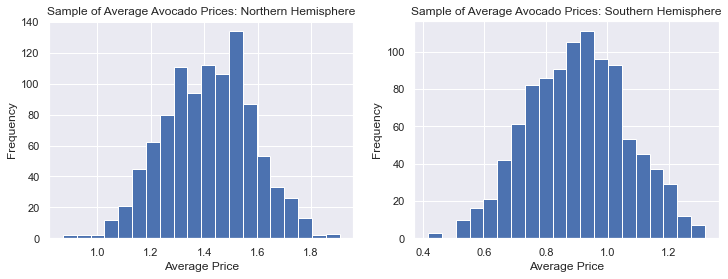

In [9]:
# Load the sample data from each hemisphere
northern_hem = pd.read_csv('data/northern_hemisphere.csv')
southern_hem = pd.read_csv('data/southern_hemisphere.csv')

# Plot histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Average Avocado Prices: Northern Hemisphere')
ax1.set_xlabel('Average Price')
ax1.set_ylabel('Frequency')
ax1.hist(northern_hem['Average Price'], bins=20)

ax2.set_title('Sample of Average Avocado Prices: Southern Hemisphere')
ax2.set_xlabel('Average Price')
ax2.set_ylabel('Frequency')
ax2.hist(southern_hem['Average Price'], bins=20)
plt.show()

We want to know if people in the Southern hemisphere spend **a different amount** on avocados on average than those in the Northern hemisphere.

First, let's answer a few questions:

1. What **kind of test** are we doing? 

    - Two-tailed
    - Independent two sample test

2. What are our **Null** and **Alternative** hypotheses? 

    - Null: People in the Northern and Southern hemispheres pay the same amount on avocados on average
    - Alternative: People in the Northern and Southern hemispheres pay a different amount on avocados
    
3. What would a **Type I** error look like in this context?

    - We incorrectly assume that there is a significant difference between the samples, when there isn't one

4. What would a **Type II** error look like in this context?

    - We incorrectly assume that there is no significant difference when there is one


Run a statistical test on the two samples. Can you reject the null hypothesis?

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

In [10]:
northern_hem['Average Price']

0      1.328146
1      1.584938
2      1.343344
3      1.346142
4      1.293508
         ...   
995    1.220664
996    1.171733
997    1.098910
998    1.556830
999    1.182431
Name: Average Price, Length: 1000, dtype: float64

In [11]:
southern_hem['Average Price']

0      0.958584
1      1.155443
2      0.718294
3      1.012027
4      0.719738
         ...   
995    0.902403
996    1.188247
997    1.124703
998    0.831532
999    0.945707
Name: Average Price, Length: 1000, dtype: float64

In [13]:
#critical level
alpha = .05

# two-tailed
stats.norm.ppf(alpha/2), stats.norm.ppf(1-alpha/2)

(-1.9599639845400545, 1.959963984540054)

In [16]:
import scipy
scipy.__version__

'1.5.2'

In [17]:
# Code here
stats.ttest_ind(northern_hem['Average Price'], southern_hem['Average Price'])

Ttest_indResult(statistic=70.04959998057625, pvalue=0.0)

**Reject or fail to reject the null hypothesis?** 

- REJECTED


What if we only want to know if people in the Southern hemisphere spend **less** than those in the Northern hemisphere? What does that change?

- From a two-tailed test to a left-tailed test


## Resources

- [The ultimate cheat sheet for statistical tests in Python, from Machine Learning Mastery](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)
- [Here's that Data Skeptic podcast link again, on 'Defending the p-value'](https://podcasts.apple.com/us/podcast/defending-the-p-value/id890348705?i=1000494460371)